In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#INFEKSI DATA

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('wine-clustering.csv')


In [6]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#PRA-PEMROSESAN DATA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
df = df.dropna()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

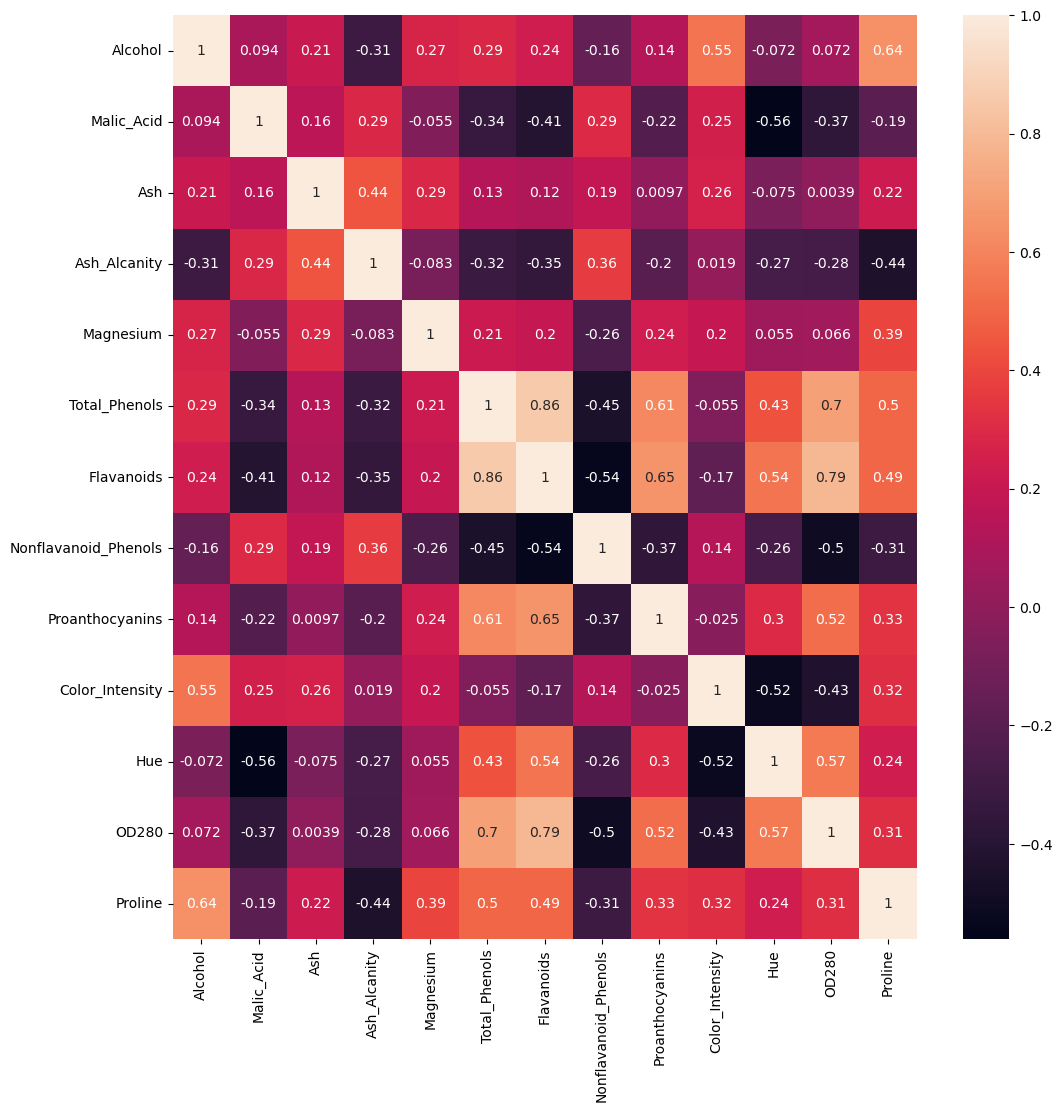

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True)

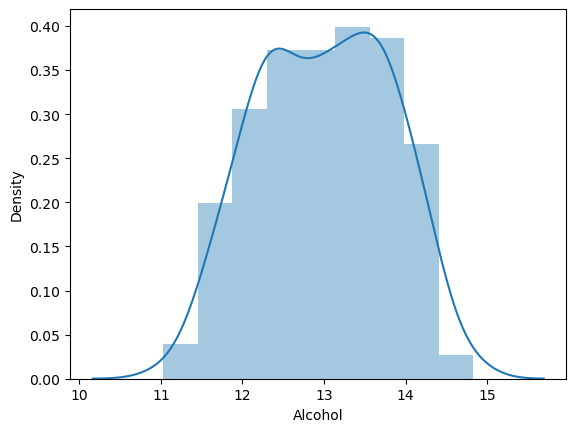

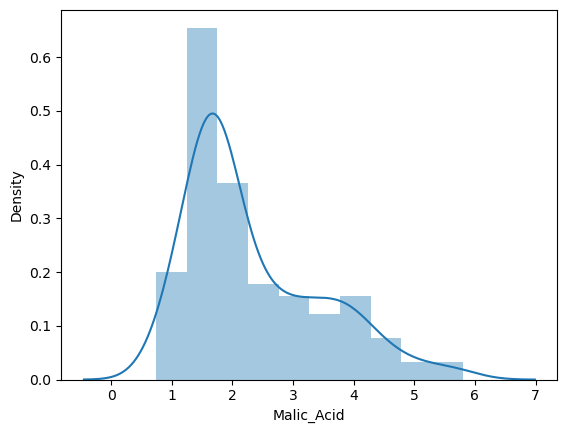

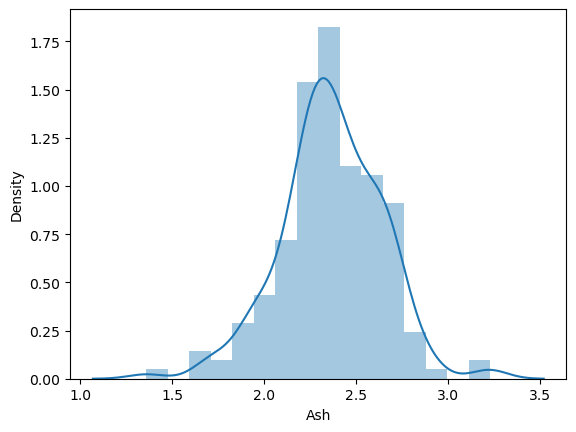

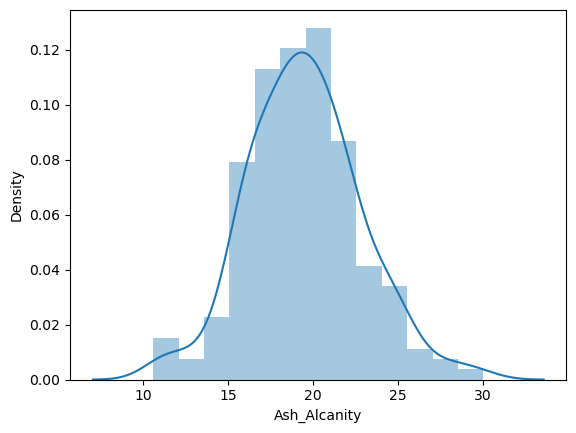

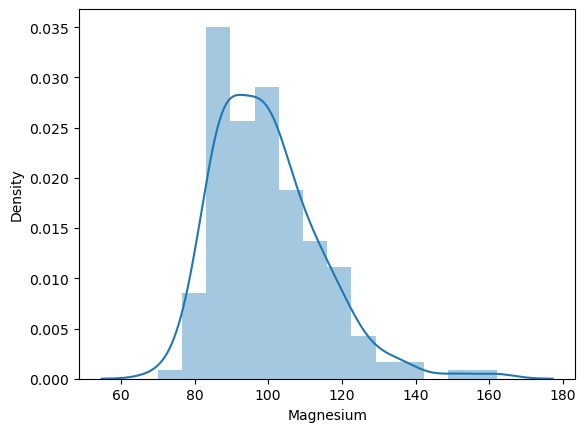

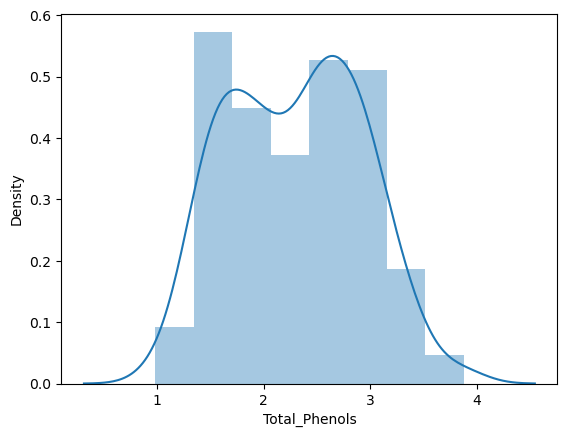

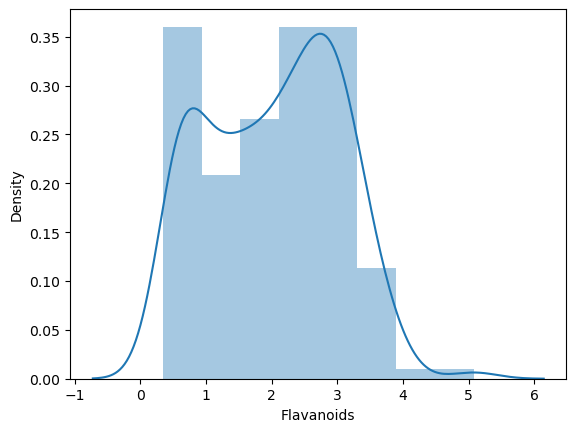

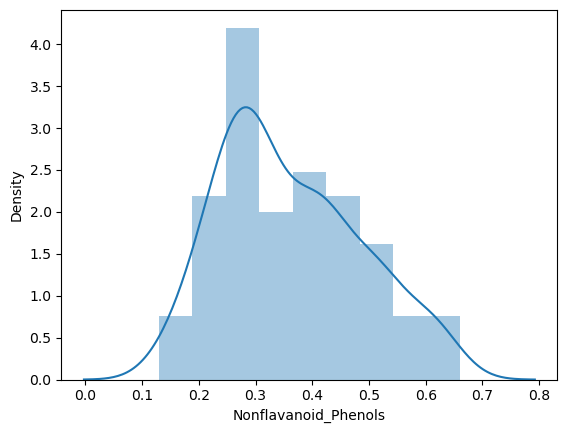

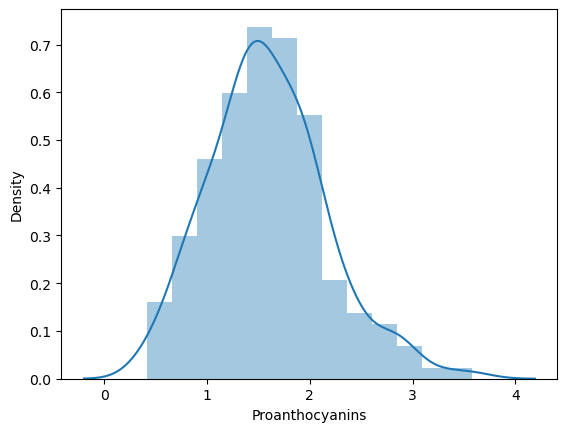

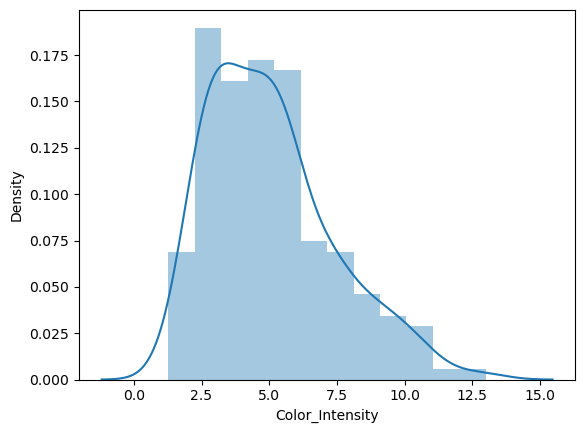

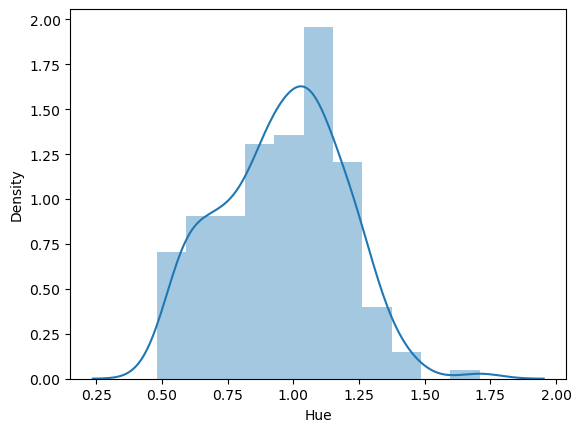

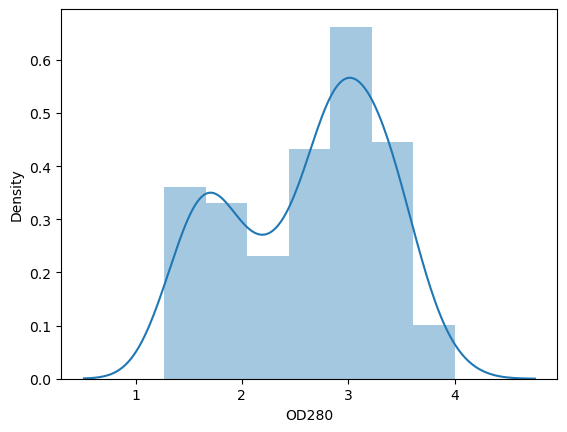

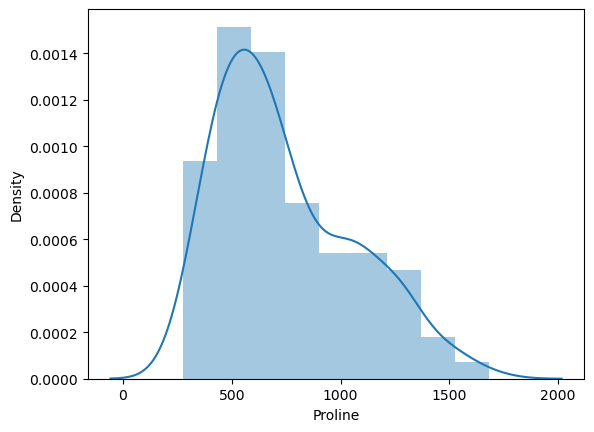

In [11]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

#Pengurangan Dimensi-PCA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

In [16]:
print(df_pca.head())

       PCA1      PCA2
0  3.316751  1.443463
1  2.209465 -0.333393
2  2.516740  1.031151
3  3.757066  2.756372
4  1.008908  0.869831


#KEKELOMPOKAN

In [17]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_pca)

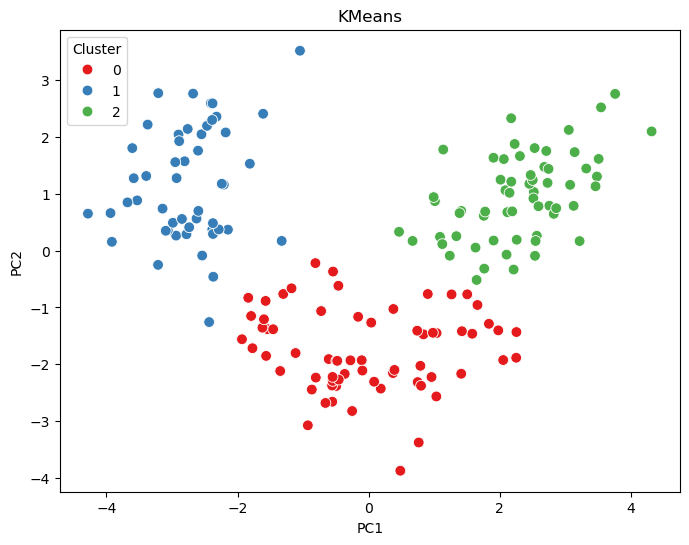

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_clusters, palette="Set1", s=60)
plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [20]:
agg = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg.fit_predict(df_pca)

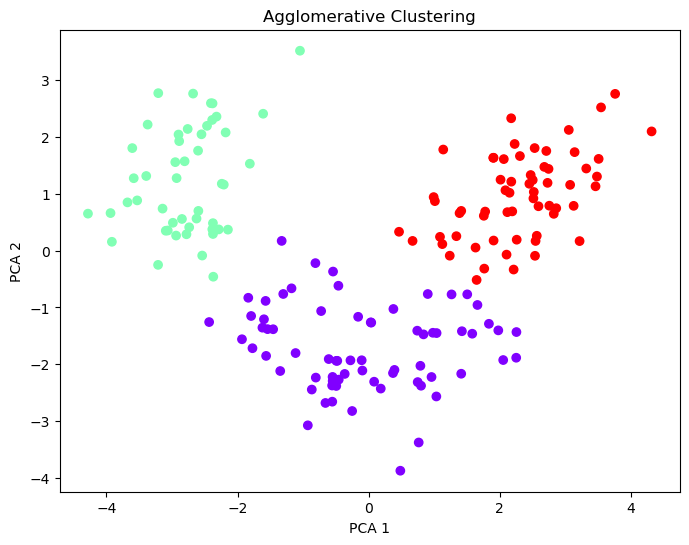

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=agg_clusters, cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [22]:
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_pca)


n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

print(f"Number of clusters created: {n_clusters}")
print(f"Number of points considered as noise: {n_noise}")

Number of clusters created: 2
Number of points considered as noise: 6


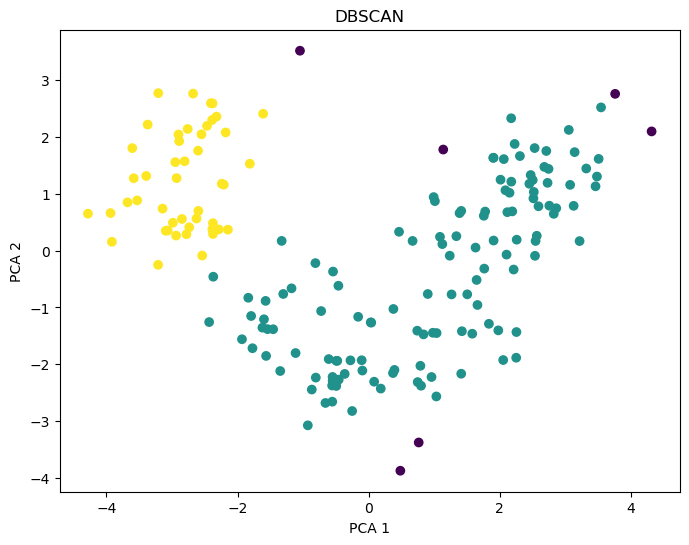

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_clusters, cmap='viridis')
plt.title("DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

#EVALUASI PENGELOMPOKAN

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score

In [25]:
def evaluate_clustering(X, labels, name):
    print(f"\n🔹 {name} Clustering")
    print("Silhouette Score:        {:.3f}".format(silhouette_score(X, labels)))
    print("Davies-Bouldin Score:    {:.3f}".format(davies_bouldin_score(X, labels)))
    print("Calinski-Harabasz Score: {:.3f}".format(calinski_harabasz_score(X, labels)))

In [26]:
evaluate_clustering(X_pca, kmeans_clusters, "KMeans")
evaluate_clustering(X_pca, agg_clusters, "Agglomerative")
evaluate_clustering(X_pca, dbscan_clusters, "DBSCAN")


🔹 KMeans Clustering
Silhouette Score:        0.560
Davies-Bouldin Score:    0.598
Calinski-Harabasz Score: 343.949

🔹 Agglomerative Clustering
Silhouette Score:        0.559
Davies-Bouldin Score:    0.601
Calinski-Harabasz Score: 341.058

🔹 DBSCAN Clustering
Silhouette Score:        0.352
Davies-Bouldin Score:    3.465
Calinski-Harabasz Score: 75.381


#PREDIKSI PENUAAN ANGGUR

In [27]:
new_samples = np.array([
    [11.0, 0.5, 1.0, 10.0, 70.0, 0.5, 0.1, 0.6, 0.3, 1.0, 0.3, 1.0, 100.0],   
    [14.8, 5.0, 3.5, 30.0, 160.0, 3.5, 4.0, 0.2, 2.5, 14.0, 1.8, 4.0, 1500.0], 
    [13.2, 1.7, 2.2, 20.0, 100.0, 1.7, 0.5, 1.5, 1.8, 10.0, 0.6, 2.0, 600.0]   
])

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_samples)

In [29]:
pca = PCA(n_components=2)
new_samples_pca = pca.fit_transform(X_scaled)

In [30]:
ndf_pca = pd.DataFrame(new_samples_pca, columns=['PCA1', 'PCA2'])
print(ndf_pca.head())

       PCA1      PCA2
0 -3.829379 -0.978608
1  4.480582 -0.606064
2 -0.651203  1.584672


In [32]:
predicted_kmeans = kmeans.predict(ndf_pca)

for i, label in enumerate(predicted_kmeans):
    print(f"New sample {i+1} is assigned to cluster: {label}")


New sample 1 is assigned to cluster: 1
New sample 2 is assigned to cluster: 2
New sample 3 is assigned to cluster: 1


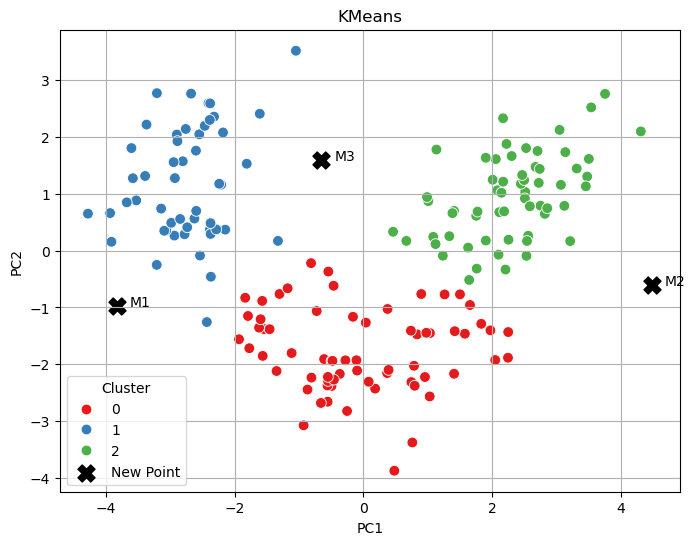

In [35]:
# Plot k-means plot with 3 new points
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=kmeans_clusters, palette="Set1", s=60, legend='full'
)

# Plot 3 new points
plt.scatter(
    new_samples_pca[:, 0], new_samples_pca[:, 1],
    color='black', marker='X', s=150, label='New Point'
)

# Label each new point
for i, (x, y) in enumerate(new_samples_pca):
    plt.text(x + 0.2, y, f'M{i+1}', fontsize=10, color='black')

plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [37]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min

centroids = []
for label in np.unique(agg_clusters): 
    cluster_points = X_pca[agg_clusters == label] 
    centroid = cluster_points.mean(axis=0) 
    centroids.append(centroid)
centroids = np.array(centroids)

assigned_labels, distances = pairwise_distances_argmin_min(new_samples_pca, centroids)

for i, label in enumerate(assigned_labels): 
    print(f"New sample {i+1} assigned to cluster (Agglomeration): {label}")


New sample 1 assigned to cluster (Agglomeration): 1
New sample 2 assigned to cluster (Agglomeration): 2
New sample 3 assigned to cluster (Agglomeration): 1


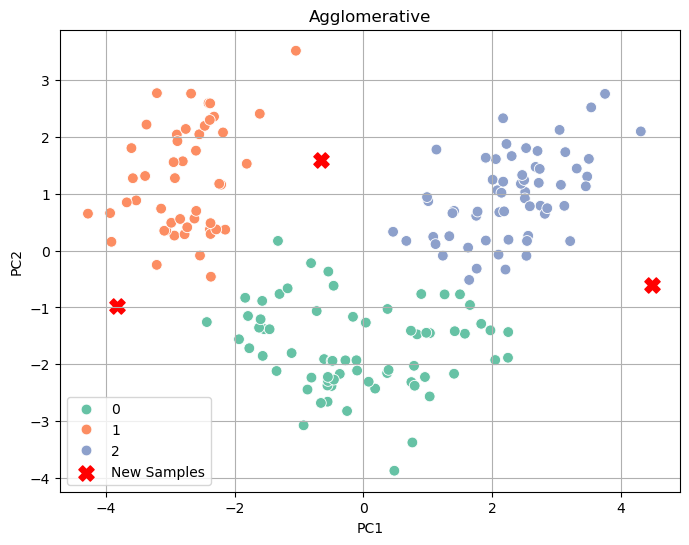

In [38]:
plt.figure(figsize=(8, 6))


sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg_clusters, palette="Set2", s=60, legend='full')

plt.scatter(new_samples_pca[:, 0], new_samples_pca[:, 1],
            color='red', marker='X', s=120, label='New Samples')

plt.title("Agglomerative")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances


dbscan_core_samples = X_pca[dbscan_clusters != -1]
dbscan_labels = dbscan_clusters[dbscan_clusters != -1]


distances = pairwise_distances(new_samples_pca, dbscan_core_samples)


predicted_dbscan = []
for i in range(len(new_samples_pca)):
    min_idx = np.argmin(distances[i])
    min_distance = distances[i][min_idx]
    if min_distance <= dbscan.eps:
        predicted_dbscan.append(dbscan_labels[min_idx])
    else:
        predicted_dbscan.append(-1) 


for i, label in enumerate(predicted_dbscan):
    if label == -1:
        print(f"New sample {i+1} is marked as noise (DBSCAN): {label}")
    else:
        print(f"New sample {i+1} is assigned to cluster (DBSCAN): {label}")


New sample 1 is marked as noise (DBSCAN): -1
New sample 2 is marked as noise (DBSCAN): -1
New sample 3 is marked as noise (DBSCAN): -1


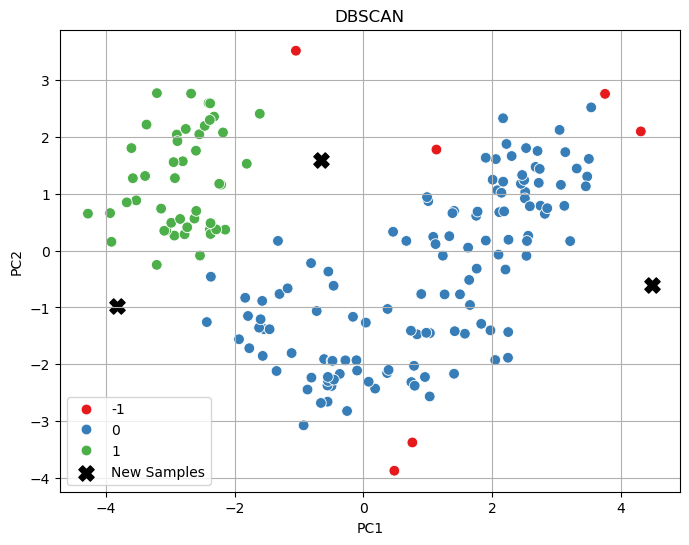

In [ ]:
plt.figure(figsize=(8, 6))


sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_clusters, palette="Set1", s=60, legend='full')


plt.scatter(new_samples_pca[:, 0], new_samples_pca[:, 1],
            color='black', marker='X', s=120, label='New Samples')

plt.title("DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()